## Smart home realtime activity recognition 

This notebook contains code from Medium's article about smart home realtime activity recognition.  

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score
from data_processor import get_train_test_data, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = 'aruba.csv'
DATA_1 = '2011-01-21'
DATA_2 = '2011-05-23'

np.set_printoptions(threshold=np.nan)
np.set_printoptions(precision=2)

We will now clean data, make segments and calculate mutual info matrix. All of this methods are in data_processor.py

Calling get_train_test_data returns train and test data that ready to fitting model and classes which is just an array of activity names for confusion matrix. It takes DATA_PATA which is just path to data, DATA1 is a date before which train dataset is formed, DATA_2 is a date after which the test set is formed.

You have to unzip the aruba.rar in folder with notebook. 

Please note  that due to data volume this process is pretty long and can take like 10 minutes. 

In [8]:
train_x, train_y, test_x, test_y, classes = get_train_test_data(DATA_PATH, DATA_1, DATA_2)

Assuming we have imbalance problem in our dataset, we will use balanced mode.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.

In [9]:
clf = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=40, 
                             max_depth=None, min_samples_split=2, verbose=False, class_weight='balanced')

Now we are ready to train model and make predictions. 

In [11]:
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)

In [12]:
accuracy_score(predictions, test_y)

0.93493853273747995

Accuracy is pretty high, but assuming we have imbalanced problem in our dataset using this metric is not the best idea. Instead lets try use balanced_accuracy_score which returns the average of recall obtained on each class.

In [15]:
balanced_accuracy_score(predictions, test_y)

0.61774417878146959

Well, this metric is much lower, lets look at confusion matrix.

Normalized confusion matrix


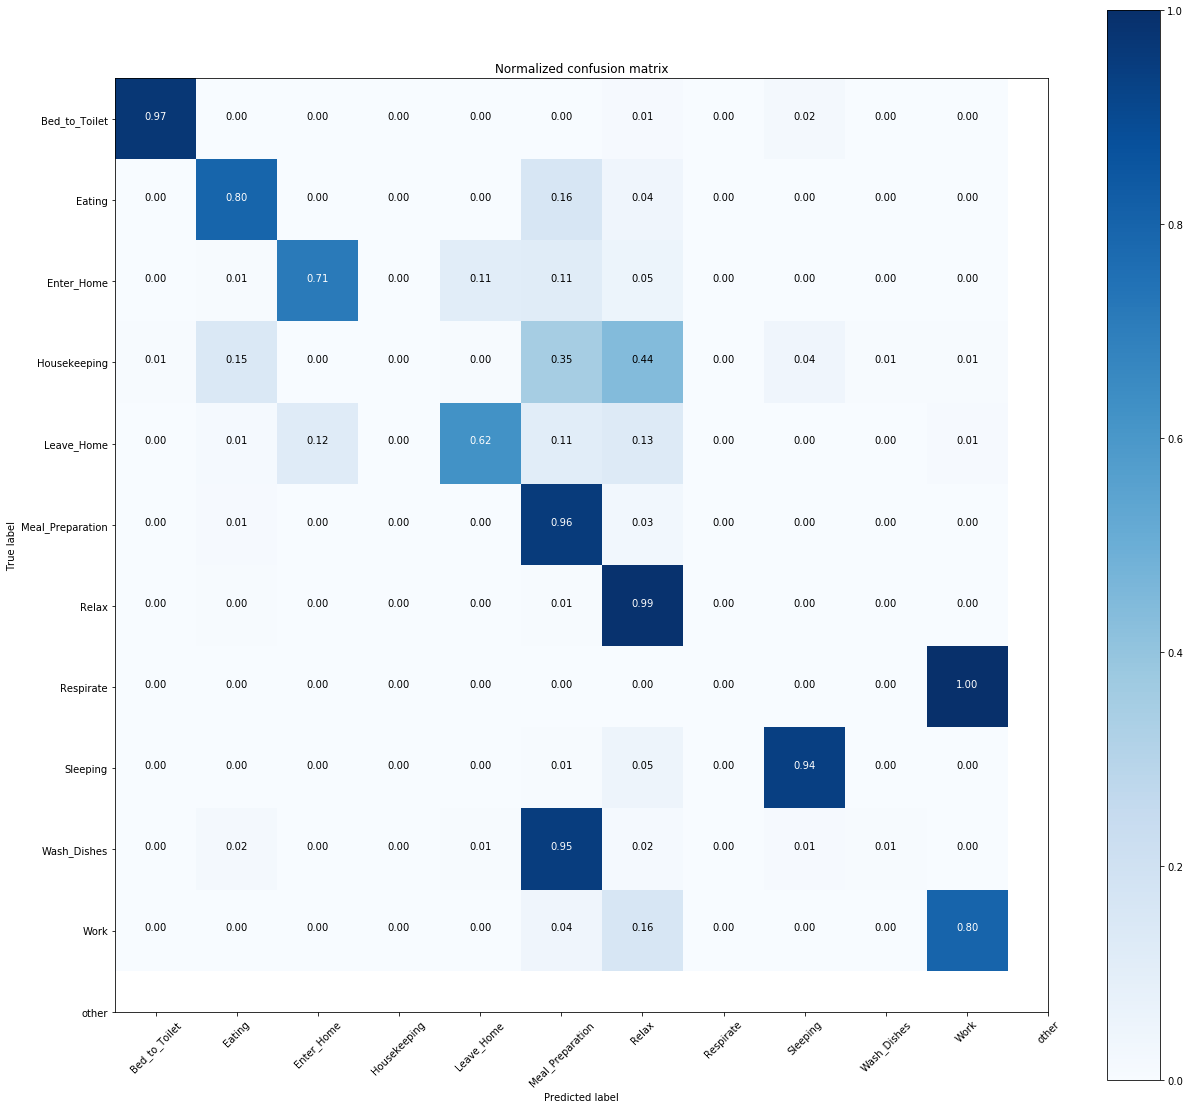

In [20]:
cnf_matrix = confusion_matrix(predictions, test_y)
plt.figure(figsize=(18, 16))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True, 
                      title='Normalized confusion matrix')
plt.show()

There are some activities like 'Respirate', that has no true predictions at all. Let's look at not normalized confusion matrix. 

Confusion matrix, without normalization


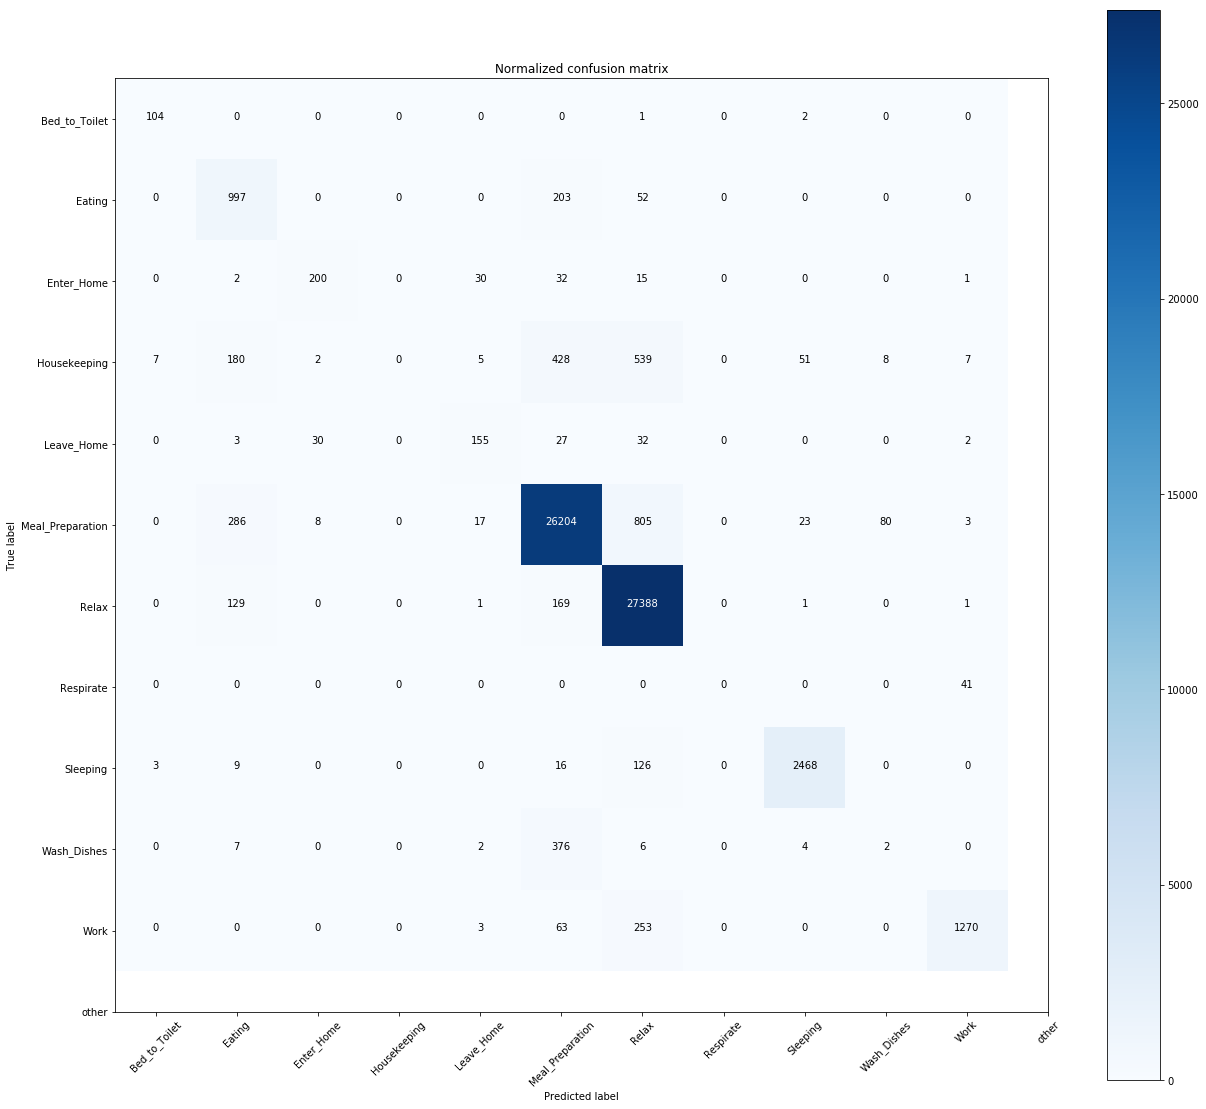

In [23]:
plt.figure(figsize=(18, 16))
plot_confusion_matrix(cnf_matrix, classes=classes, normalize=False, 
                      title='Normalized confusion matrix')
plt.show()

As you can see 'Respirate' activity is pretty rare and we could delete this one from the dataset(in some papers you can find such decisions). Activities 'Housekeeping' and 'Wash_Dishes' also were predicted wrongly. It may occur due to limitations of binary sensors approach, activities may overlap and it's hard to distinguish them. Please, note that we used only the first 3 weeks to train model and increasing size of the training set should improve accuracy. Moreover we used just a simple random forest model, usually, there are more complex approaches in recent papers.